In [6]:
from pyspark.sql import SparkSession

# Cria uma sessão Spark
spark = SparkSession.builder \
    .appName("ExemploSparkVSCode") \
    .getOrCreate()

print("SparkSession criada com sucesso!")

SparkSession criada com sucesso!


In [7]:
df_carteiras = spark.read.csv('/workspaces/Apex-Financial_Group/Dados/carteira_investimentos.csv', header=True, inferSchema=True)
df_carteiras.createOrReplaceGlobalTempView("carteiras")
df_carteiras.show()

+----------+----------+------------+----------+----------+---------------------+--------------------+-------------------+
|id_posicao|id_cliente|ticker_ativo|nome_ativo|quantidade|custo_medio_da_compra|data_ultima_operacao|valor_mercado_atual|
+----------+----------+------------+----------+----------+---------------------+--------------------+-------------------+
|         1|       328|       VALE3|VALE3 S.A.|     34.76|                31.13|          2025-04-11|            1118.79|
|         2|       378|       VALE3|VALE3 S.A.|    679.93|                89.76|          2020-10-19|           58111.02|
|         3|       217|       PETR4|PETR4 S.A.|      39.5|                25.77|          2022-03-02|            1224.77|
|         4|        14|       WEGE3|WEGE3 S.A.|    206.85|                66.74|          2025-07-04|           16938.46|
|         5|       113|       RENT3|RENT3 S.A.|    593.37|                 81.9|          2024-04-25|           43926.79|
|         6|       413| 

In [8]:
df_historico_transacoes = spark.read.csv('/workspaces/Apex-Financial_Group/Dados/historico_transacoes.csv', header=True, inferSchema=True)
df_historico_transacoes.createOrReplaceGlobalTempView("transacoes")
df_historico_transacoes.show()

+-----------+----------+--------------------+---------+-------------+---------------+--------------------+----------+-----------+-----------+----------------+
|id_trasacao|id_cliente| data_hora_transacao|valor_brl|tipo_trasacao|categoria_gasto|       merchant_name|  latitude|  longitude|dispositivo|status_transacao|
+-----------+----------+--------------------+---------+-------------+---------------+--------------------+----------+-----------+-----------+----------------+
|          1|       393|2024-07-04 16:16:...|  2911.68|      crédito|         outros|            Caldeira| 27.728293| 172.337451|     tablet|       rejeitada|
|          2|       183|2025-06-13 09:36:...|  2381.75|      crédito|          lazer|Carvalho Fogaça e...| 26.490292|-176.880663|     tablet|       rejeitada|
|          3|        76|2023-01-21 07:40:...|  3841.16|       débito|    alimentação|Camargo Correia L...| -79.19378| -108.23092|        web|       rejeitada|
|          4|       255|2022-08-08 04:27:...| 

In [9]:
df_registro_clientes = spark.read.csv('/workspaces/Apex-Financial_Group/Dados/registo_clientes.csv', header=True, inferSchema=True)
df_registro_clientes.createOrReplaceTempView("registro_clientes")
df_registro_clientes.show()

+----------+-------------+--------------------+--------------+---------------+---------+-----------------+------+--------------------+------------------+---------------------+----------------+------------+-----------------+-----------------+
|id_cliente|data_cadastro|       nome_completo|           cpf|data_nascimento|   genero|           cidade|estado|           profissao|renda_mensal_bruta|score_credito_inicial|segmento_cliente|status_conta|data_ultimo_login|data_cancelamento|
+----------+-------------+--------------------+--------------+---------------+---------+-----------------+------+--------------------+------------------+---------------------+----------------+------------+-----------------+-----------------+
|         1|   2023-10-29|   Davi Miguel Sousa|189.430.652-05|     1951-01-29|Masculino|       Montenegro|    RN|          Almoxarife|          15218.68|               434.69|         Premium|   Cancelada|       2024-04-27|             NULL|
|         2|   2023-06-08|     H

In [10]:
df_solicitacoes_emprestimo = spark.read.csv('/workspaces/Apex-Financial_Group/Dados/solicitacoes_emprestimo.csv', header=True, inferSchema=True)
df_solicitacoes_emprestimo.createOrReplaceTempView("sol_emprestimo")
df_solicitacoes_emprestimo.show()

+--------------+----------+----------------+--------------------+-----------------+-----------+----------+--------+-------+---------------------+---------------------+
|id_solicitacao|id_cliente|data_solicitacao|valor_solicitado_brl|taxa_juros_mensal|prazo_meses|finalizade|aprovado|default|dias_atraso_historico|score_risco_calculado|
+--------------+----------+----------------+--------------------+-----------------+-----------+----------+--------+-------+---------------------+---------------------+
|             1|       493|      2023-02-07|            20874.01|             0.77|         24| Concluída|   false|  false|                   89|               776.34|
|             2|       128|      2025-08-01|            12753.96|              4.3|         36|  Pendente|    true|  false|                   18|               617.58|
|             3|       138|      2024-03-15|             4238.06|             4.08|          6|  Pendente|    true|  false|                   65|               

Calcule a média do score_risco_calculado para cada segmento_cliente.

In [11]:
spark.sql(""" 
            SELECT 
                c.id_cliente,
                c.nome_completo,
                AVG(s.score_risco_calculado) as media_scrore_risco,
                c.segmento_cliente
            FROM
                registro_clientes c
            INNER JOIN
                sol_emprestimo s
            ON 
                c.id_cliente = s.id_cliente
            GROUP BY
                c.id_cliente, c.nome_completo, c.segmento_cliente
            ORDER BY
                media_scrore_risco DESC
        
            """).show()

+----------+--------------------+------------------+----------------+
|id_cliente|       nome_completo|media_scrore_risco|segmento_cliente|
+----------+--------------------+------------------+----------------+
|       120|          Ravi Rocha|            848.02|        Standard|
|       234|       Nicolas Gomes|            840.61|         Economy|
|       217|Dra. Valentina Va...|            837.08|        Standard|
|       156|   Ana Vitória Porto|            835.82|         Economy|
|       229|   José Miguel Abreu|             834.4|         Premium|
|       278|   Ryan da Conceição|            833.78|         Economy|
|       215|       Danilo Guerra|            833.77|        Standard|
|       191|   Manuella Nogueira|            833.31|        Standard|
|       379|         Alice Moura|            829.36|         Economy|
|       177|     Marina Silveira|            821.65|         Premium|
|       471|     Kamilly Correia|             821.1|         Premium|
|       228|    Mari

Analise de distribuição da renda_mensal_bruta e do score_credito_inicial por segmento.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pyspark.sql import functions as F

/tmp/ipykernel_12314/832433096.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


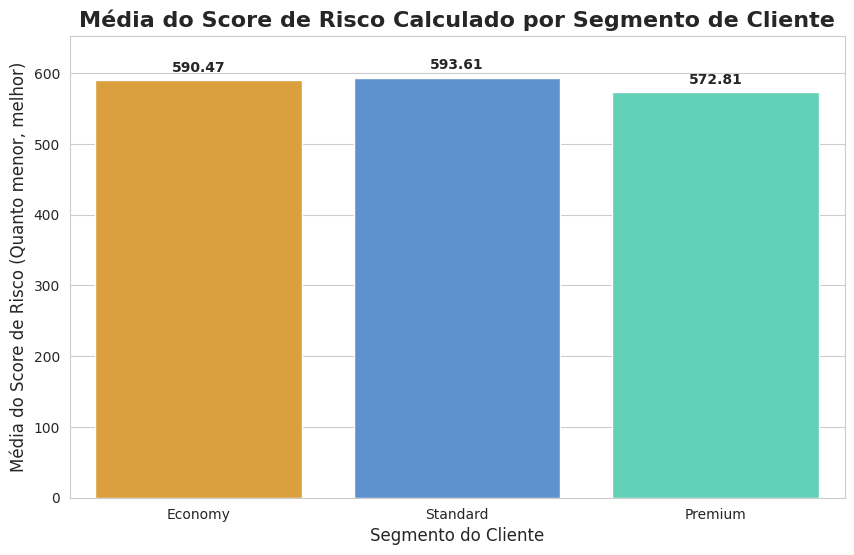

/tmp/ipykernel_12314/832433096.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


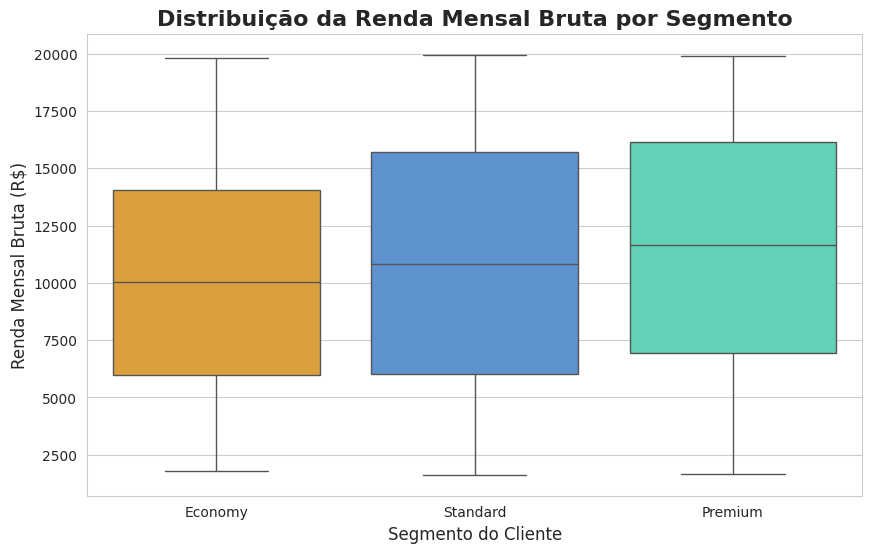

/tmp/ipykernel_12314/832433096.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


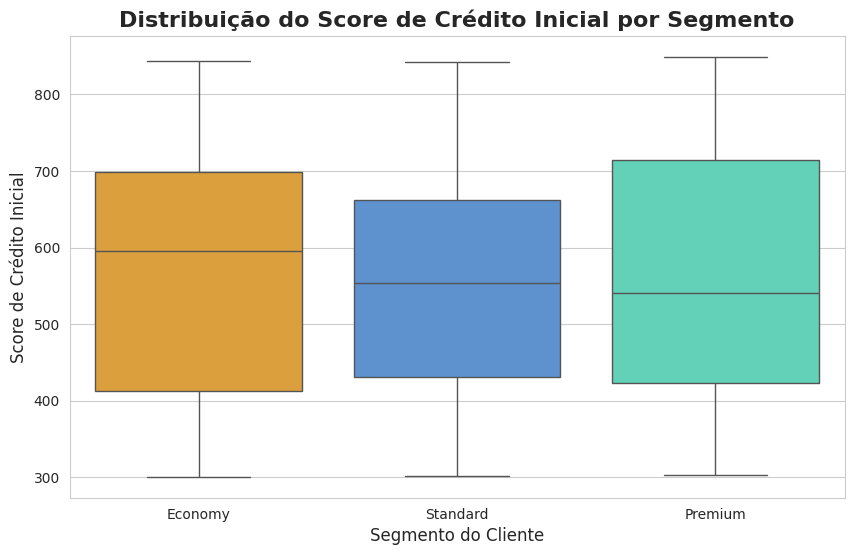

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# --- Passo 1: Preparação dos Dados ---
# Assumindo que os arquivos CSV já foram carregados em DataFrames Spark
# e registrados como temp views 'registro_clientes' e 'sol_emprestimo'.

# Junta as duas tabelas para ter todas as informações em um único DataFrame
df_joined = spark.table("registro_clientes").alias("c") \
    .join(
        spark.table("sol_emprestimo").alias("s"),
        "id_cliente",
        "inner"
    )

# --- Passo 2: Cálculo das Métricas de Risco ---
# Agrupa por segmento e calcula a média do score de risco calculado.
df_risk_summary = df_joined.groupBy("segmento_cliente") \
    .agg(
        F.avg("score_risco_calculado").alias("media_score_risco")
    ) \
    .orderBy("media_score_risco", ascending=False)

# Converte os resultados agregados para Pandas para o gráfico de barras
pd_risk_summary = df_risk_summary.toPandas()

# Converte o DataFrame juntado para Pandas para os boxplots
# Para datasets muito grandes, seria ideal usar .sample() antes do .toPandas()
pd_distributions = df_joined.select(
    "segmento_cliente", 
    "renda_mensal_bruta", 
    "score_credito_inicial"
).toPandas()

# --- Passo 3: Visualização ---

# Definindo um estilo visual agradável e a ordem dos segmentos
sns.set_style("whitegrid")
segment_order = ['Economy', 'Standard', 'Premium']
palette_colors = {"Economy": "#f5a623", "Standard": "#4a90e2", "Premium": "#50e3c2"}

# Gráfico 1: Média do Score de Risco por Segmento (Gráfico de Barras)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=pd_risk_summary,
    x='segmento_cliente',
    y='media_score_risco',
    order=segment_order,
    palette=palette_colors
)
plt.title('Média do Score de Risco Calculado por Segmento de Cliente', fontsize=16, fontweight='bold')
plt.xlabel('Segmento do Cliente', fontsize=12)
plt.ylabel('Média do Score de Risco (Quanto menor, melhor)', fontsize=12)
plt.ylim(0, pd_risk_summary['media_score_risco'].max() * 1.1)

# Adicionando os rótulos de dados nas barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points',
                     fontweight='bold')

plt.show()

# Gráfico 2: Distribuição da Renda Mensal Bruta por Segmento (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=pd_distributions,
    x='segmento_cliente',
    y='renda_mensal_bruta',
    order=segment_order,
    palette=palette_colors,
    showfliers=False # Oculta outliers para melhor visualização da "caixa"
)
plt.title('Distribuição da Renda Mensal Bruta por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento do Cliente', fontsize=12)
plt.ylabel('Renda Mensal Bruta (R$)', fontsize=12)
plt.show()

# Gráfico 3: Distribuição do Score de Crédito Inicial por Segmento (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=pd_distributions,
    x='segmento_cliente',
    y='score_credito_inicial',
    order=segment_order,
    palette=palette_colors
)
plt.title('Distribuição do Score de Crédito Inicial por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento do Cliente', fontsize=12)
plt.ylabel('Score de Crédito Inicial', fontsize=12)
plt.show()

Analise a distribuição da renda_mensal_bruta e do score_credito_inicial por segmento.

In [15]:
spark.sql(""" 
           SELECT
    segmento_cliente,

    -- Estatísticas da Renda Mensal Bruta
    MIN(renda_mensal_bruta) AS renda_min,
    APPROX_PERCENTILE(renda_mensal_bruta, 0.25) AS renda_quartil_25,
    APPROX_PERCENTILE(renda_mensal_bruta, 0.5) AS renda_mediana,
    APPROX_PERCENTILE(renda_mensal_bruta, 0.75) AS renda_quartil_75,
    MAX(renda_mensal_bruta) AS renda_max,
    AVG(renda_mensal_bruta) AS renda_media,

    -- Estatísticas do Score de Crédito Inicial
    MIN(score_credito_inicial) AS score_min,
    APPROX_PERCENTILE(score_credito_inicial, 0.25) AS score_quartil_25,
    APPROX_PERCENTILE(score_credito_inicial, 0.5) AS score_mediana,
    APPROX_PERCENTILE(score_credito_inicial, 0.75) AS score_quartil_75,
    MAX(score_credito_inicial) AS score_max,
    AVG(score_credito_inicial) AS score_media

FROM
    registro_clientes
GROUP BY
    segmento_cliente
ORDER BY
    renda_mediana DESC;""").show()


+----------------+---------+----------------+-------------+----------------+---------+------------------+---------+----------------+-------------+----------------+---------+-----------------+
|segmento_cliente|renda_min|renda_quartil_25|renda_mediana|renda_quartil_75|renda_max|       renda_media|score_min|score_quartil_25|score_mediana|score_quartil_75|score_max|      score_media|
+----------------+---------+----------------+-------------+----------------+---------+------------------+---------+----------------+-------------+----------------+---------+-----------------+
|         Premium|  1595.86|         6943.36|      11381.5|        15317.27| 19979.69|11276.645827814571|   303.05|          429.36|        567.1|          717.99|   849.25|575.6969536423841|
|         Economy|  1672.34|         6001.35|     10457.67|        14059.61| 19819.31|10293.806211180123|   300.93|          432.53|       601.21|          716.23|   847.48|580.6604968944098|
|        Standard|  1582.33|         579